In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [60]:
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col= 'date')


In [61]:
# Clean data
df = df[(df['value'] >= df['value'].quantile(0.025)) &
        (df['value'] <= df['value'].quantile(0.975))]

df.head(2)

,value
date,
2016-05-19,19736
2016-05-26,18060


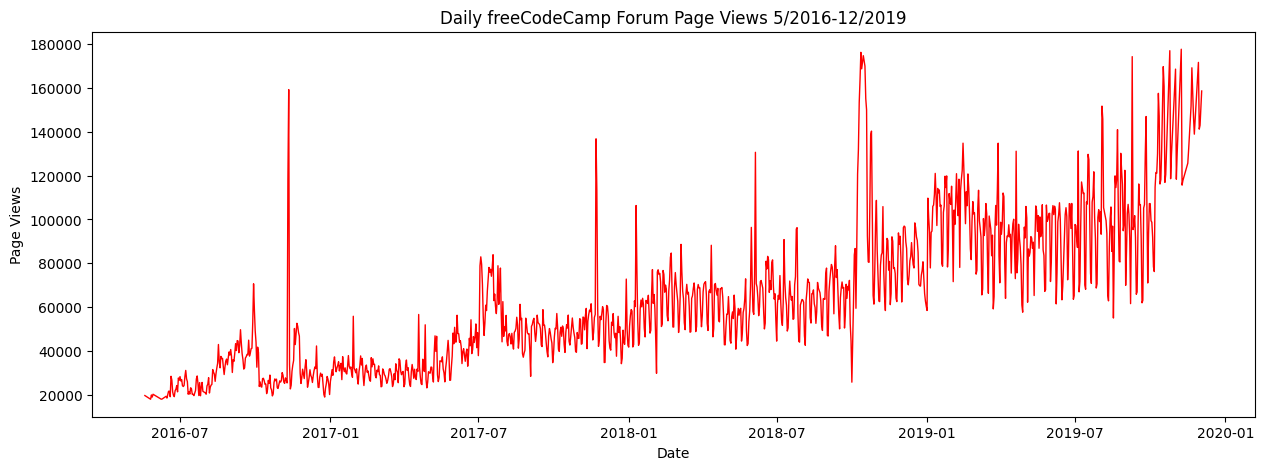

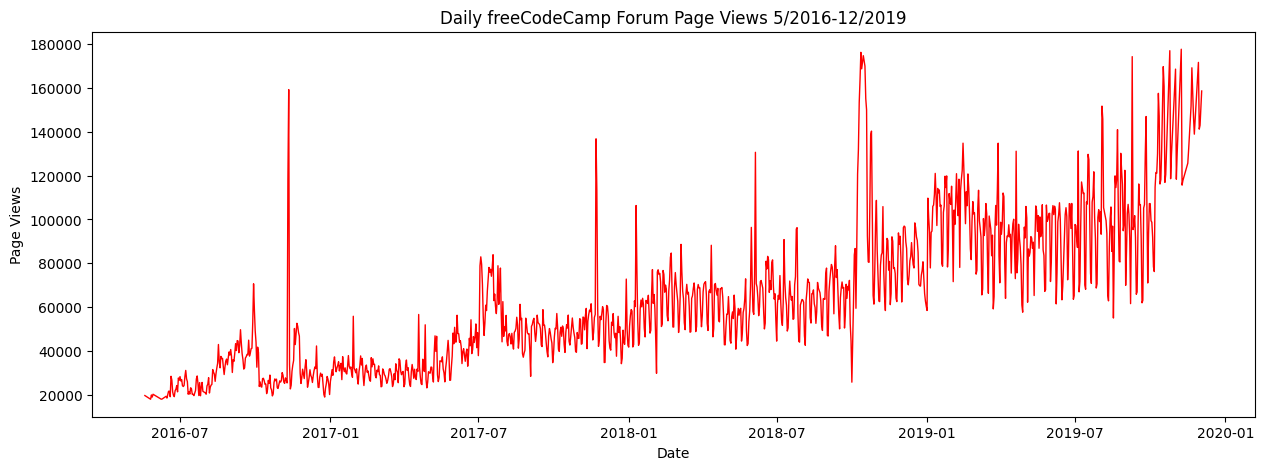

In [42]:
def draw_line_plot():
    # Create figure and plot the line chart
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(df.index, df["value"], color="red", linewidth=1)

    # Set title and labels
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")

    # Save image and return figure
    fig.savefig("line_plot.png")
    return fig

# Generate the line plot
draw_line_plot()

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

# Load the data
file_path = "fcc-forum-pageviews.csv"
df = pd.read_csv(file_path, parse_dates=["date"], index_col="date")

# Clean data: Remove the top 2.5% and bottom 2.5% of page views
lower_bound = df["value"].quantile(0.025)
upper_bound = df["value"].quantile(0.975)
df = df[(df["value"] >= lower_bound) & (df["value"] <= upper_bound)]

# Display basic info about the cleaned dataset
df.describe()


,value
count,1238.000000
mean,63060.147819
std,31674.626598
min,18060.000000
25%,37244.250000
50%,57197.500000
75%,81646.500000
max,177588.000000


PART 2

In [ ]:
# df_new = df.copy()

In [ ]:
# df_new['year'] = df.index.year
# df_new['month'] = df.index.month
# df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


In [ ]:
# df_grouped = df_new.groupby(['year', 'month'], as_index=False).agg({
#     'value': 'mean'
# })

In [ ]:
# df_grouped.head()

,year,month,value
0,2016,5,19432.400000
1,2016,6,21875.105263
2,2016,7,24109.678571
3,2016,8,31049.193548
4,2016,9,41476.866667


In [74]:
df_bar = df.copy

In [ ]:
df_bar['year'] = df.index.year
df_bar['month'] = df.index.month

In [77]:

df_bar = df.copy()
df_bar['year'] = df.index.year
df_bar['month'] = df.index.month
df.head()


,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


In [80]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar['year'] = df.index.year
    df_bar['month'] = df.index.month
    df_bar = df_bar.groupby(["year", "month"])["value"].mean().unstack()

    # Draw bar plot
    fig = df_bar.plot(kind="bar", figsize=(8, 6)).figure

    # Set labels and title
    plt.xlabel("Years")
    plt.ylabel("Average Page Views")
    plt.title("Average Daily Page Views per Month")
    plt.legend(
        title="Months",
        labels=[
            "Jan", "Feb", "Mar", "Apr", "May", "Jun",
            "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
        ]
    )

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

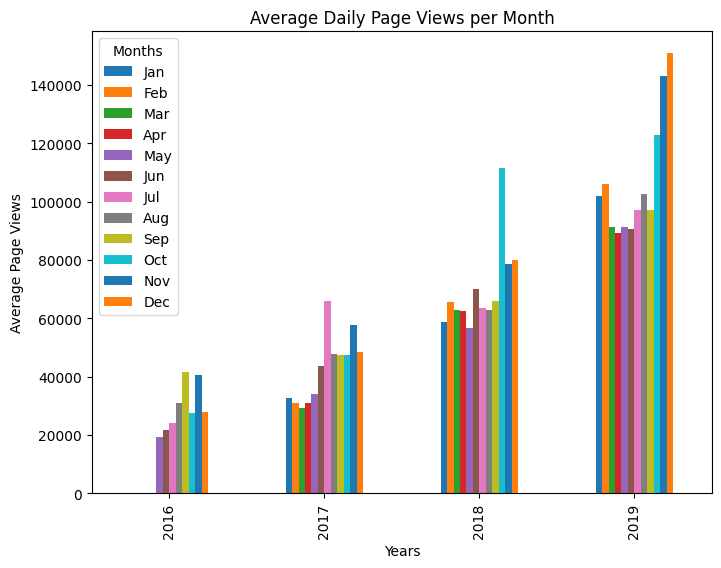

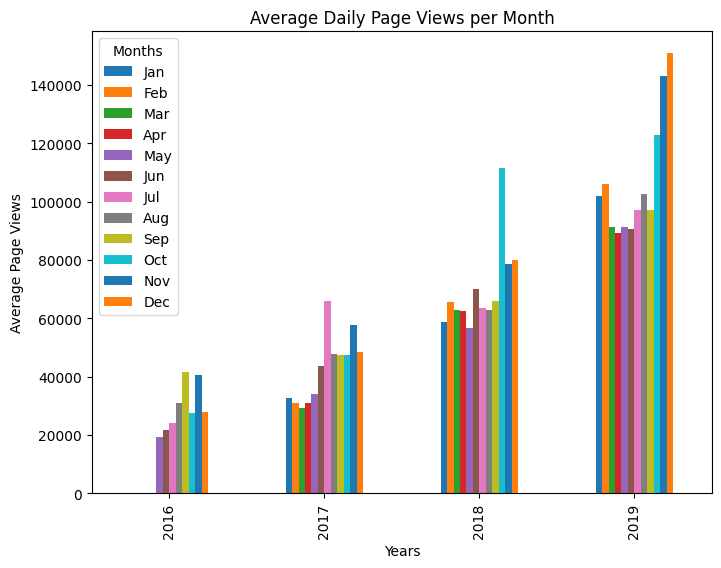

In [81]:
draw_bar_plot()

In [97]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    fig, axes = plt.subplots(1,2,figsize=(15,6))
    #plt.subplots(1, 2, figsize=(15, 6))

    #year wise box plots
    sns.boxplot(x='year', y='value', data=df_box, ax= axes[0], palette="Set3")
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')

    #month wise box plots
    sns.boxplot(x='month', y='value', data=df_box, order= month_order, palette="Set1", ax= axes[1])
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

/var/folders/91/j49vbxl176766k90fzlj1g900000gn/T/ipykernel_65664/3120369678.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='year', y='value', data=df_box, ax= axes[0], palette="Set3")
/var/folders/91/j49vbxl176766k90fzlj1g900000gn/T/ipykernel_65664/3120369678.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='value', data=df_box, order= month_order, palette="Set1", ax= axes[1])


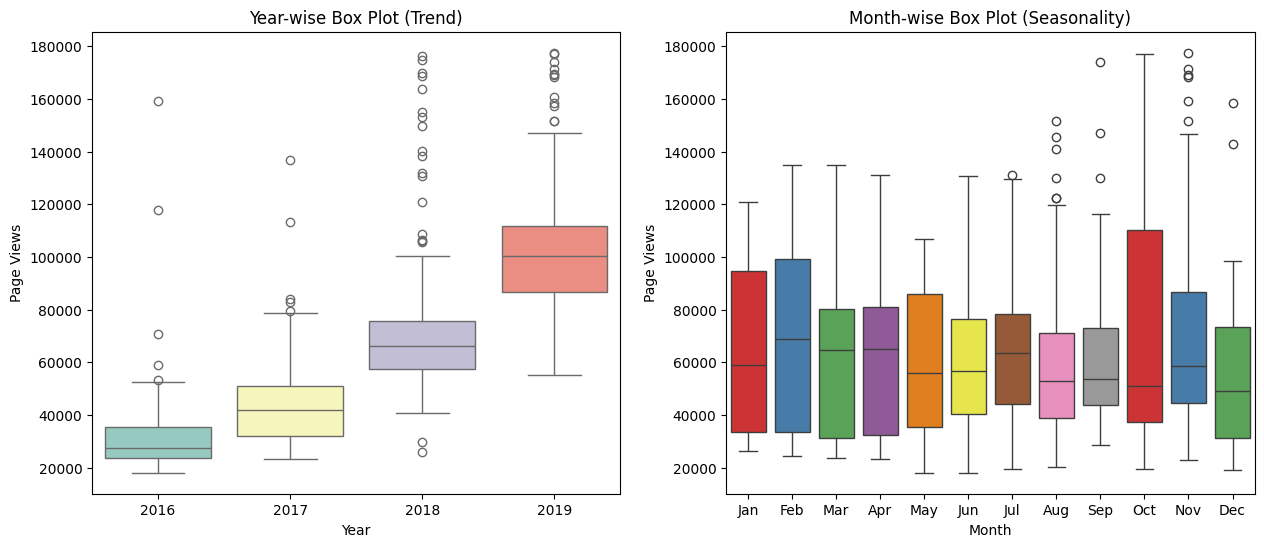

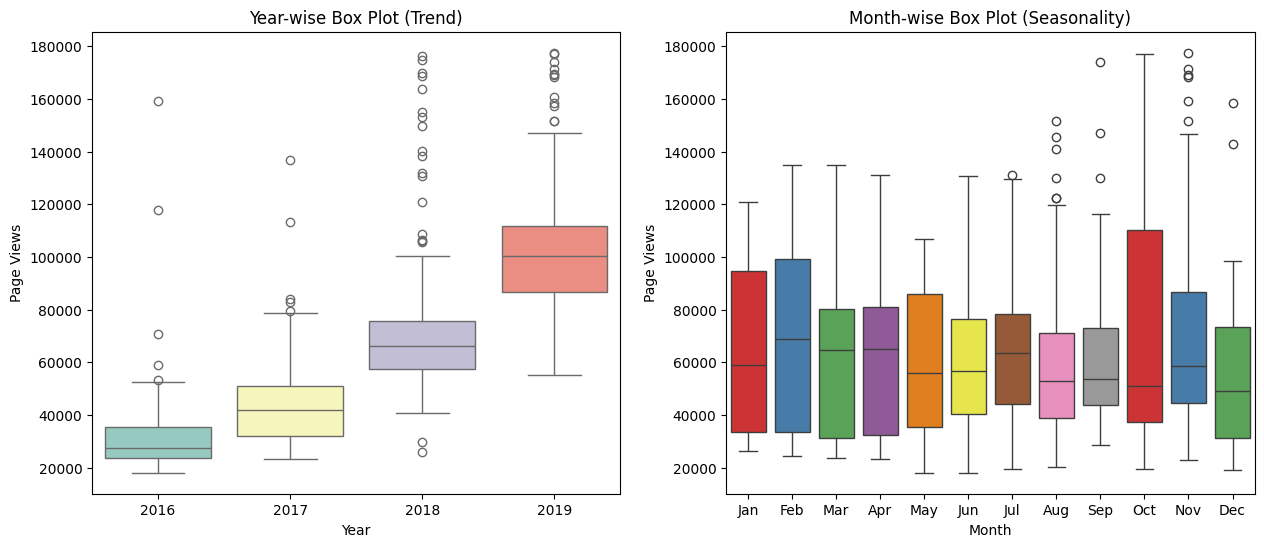

In [98]:
# Generate the box plot
draw_box_plot()